In [2]:
import pandas as pd
import numpy as np
import plotly
plotly.tools.set_credentials_file(username='sherry9788', api_key='Cw40WD6lRwalI8wtPd72')
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [ ]:
df.head()

In [ ]:
df.info()

## Variables

In [ ]:
df.isna().sum()

In [ ]:
df.columns

In [4]:
df2 = df.copy().dropna()
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [ ]:
df2.describe()

## Name

In [ ]:
df.Name.nunique()

Not every one is unique, check to see what the duplicates look like

In [ ]:
df[df.Name==df[df.Name.duplicated()].Name.values[0]]

In [ ]:
df2.Platform.unique()

These are the games that have versions across multiple platforms.

## Platform

In [ ]:
data = [go.Histogram(x=df2.Platform)]
py.iplot(data, filename='Platform Frequency')

In [ ]:
platform = df2.Platform.value_counts()
print(platform)

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(platform.index, platform.values, alpha=0.8)
plt.title('Platform freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Platform')
plt.show()

## Genre

In [124]:
df2.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [125]:
genre = df2.Genre.value_counts()
print(genre)

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64


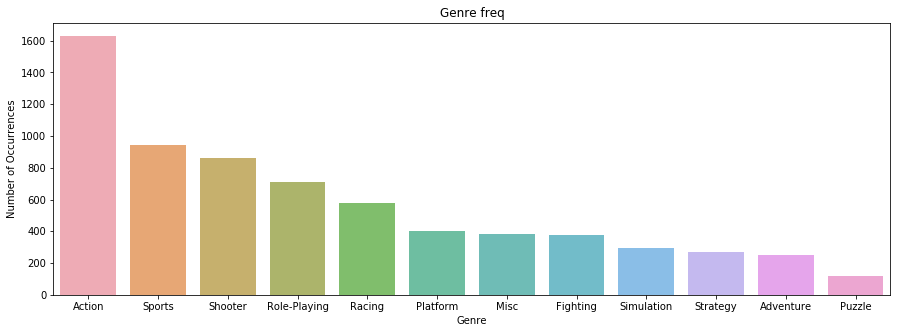

In [126]:
plt.figure(figsize=(15,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Genre freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

## Publisher

In [ ]:
df2.Publisher.unique()

In [ ]:
len(df2.Publisher.unique())

In [ ]:
df2.Publisher.value_counts().iloc[:40]

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(df2.Publisher, order=df2.Publisher.value_counts().iloc[:15].index)
plt.xticks(rotation=20)

## Year of Release

In [ ]:
np.sort(df2.Year_of_Release.unique())

In [ ]:
df2.Year_of_Release = df2.Year_of_Release.astype(int)

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(df2.Year_of_Release, kde = False, bins=df2.Year_of_Release.nunique())

## Critic_Score, Critic_Count, User_Score, User_Count

In [ ]:
df2.User_Score.unique()

In [ ]:
df2.User_Score = df2.User_Score.astype(float)
print(df2.User_Score.max())
print(df2.User_Score.min())

In [ ]:
df2.User_Count = df2.User_Count.astype(int)
print(df2.User_Count.max())
print(df2.User_Count.min())

In [ ]:
df2.Critic_Score = df2.Critic_Score.astype(float)
print(df2.Critic_Score.max())
print(df2.Critic_Score.min())

In [ ]:
df2.Critic_Count = df2.Critic_Count.astype(int)
print(df2.Critic_Count.max())
print(df2.Critic_Count.min())

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.distplot(df2.Critic_Score)

plt.subplot(2,2,2)
sns.distplot(df2.User_Score)

plt.subplot(2,2,3)
sns.distplot(df2.Critic_Count)

plt.subplot(2,2,4)
sns.distplot(df2.User_Count)

## Developer

In [ ]:
df2.Developer.unique()

In [ ]:
len(df2.Developer.unique())

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(df.Developer, order=df.Developer.value_counts().iloc[:15].index)
plt.xticks(rotation=15)

In [ ]:
sony_studio = df2.loc[(df2.Publisher.isna()==False) & (df2.Publisher.str.contains('Sony')), 'Developer'].value_counts()
print(sony_studio[np.arange(10)])

In [ ]:
len(sony_studio)

## Rating

In [ ]:
np.sort(df2.Rating.unique())

In [ ]:
rating = df2.Rating.value_counts()
print(rating)

In [ ]:
df2.loc[df2.Rating=='K-A', 'Rating'] = 'E' 

In [ ]:
rating = df2.Rating.value_counts()
print(rating)

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(rating.index, rating.values, alpha=0.8)
plt.title('Rating freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Rating')
plt.show()

In [ ]:
## NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

Game sales in North America (in millions of units)

In [ ]:
((df.Global_Sales>=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*0.99) 
& (df.Global_Sales<=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*1.01)).head()

In [ ]:
sns.pairplot(df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])

## Exploratory Analysis of the Data

## Genres

In [5]:
df2.Genre.nunique()

12

### 1) What does the critic scores and user scores of each game genre tell us?

#### Distribution of critic Scores for each game genre

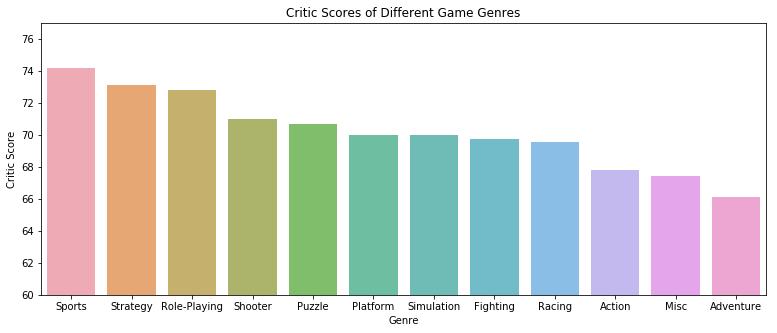

In [120]:
df2_critic=df2.groupby(['Genre']).Critic_Score.mean()
df2_critic=df2_critic.nlargest(12) #descending order of critic scores

plt.figure(figsize=(13,5))
bar=sns.barplot(df2_critic.index, df2_critic.values,alpha=0.8)
bar.set_ylim([60,77])
plt.ylabel("Critic Score")
plt.title("Critic Scores of Different Game Genres")
plt.show()

In [121]:
#df2.groupby(['Genre']).Critic_Count.sum()

##### Comment

From the plot, we can see that within all 12 genres of games, "Sports" games have the highest average critic score. The genres of "Strategy" and "Role-Playing" come after that. On the other side, the genre of "Adventure" has the lowest mean critic score. And the genres of "Misc" and "Action" have the second and third lowest mean critic scores.

#### Distribution of user scores for each game genre

Text(0.5,1,'User Scores of Different Game Genres')

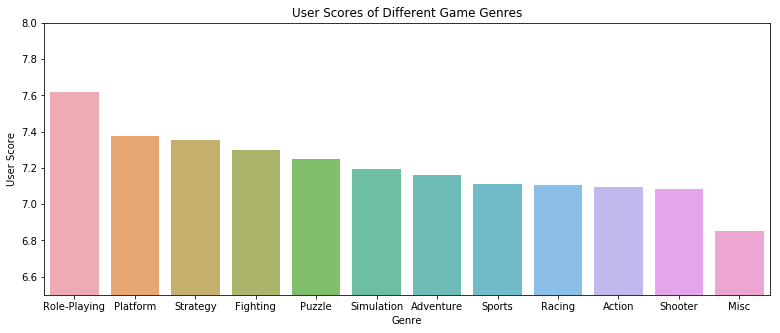

In [119]:
df2["User_Score_float"]=df2.User_Score.astype(float)
df2_user=df2.groupby(['Genre']).User_Score_float.mean()
df2_user=df2_user.nlargest(12) #descending order

plt.figure(figsize=(13,5))
bar2=sns.barplot(df2_user.index, df2_user.values,alpha=0.8)
bar2.set_ylim([6.5,8])
plt.ylabel("User Score")
plt.title("User Scores of Different Game Genres")


In [122]:
#df2.groupby(['Genre']).User_Count.sum()

##### Comment

Among all 12 genres, the genre of "Role-Playing" has the highest mean user score. The genres of "Platform" and "Strategy" come as the second and the third highest. Yet, genres of "Actions", "Shooter" and "Misc" don't seem to perform well with this standard because they are on the other side of the scale, meaning they have lower average user scores.

#### Comparison between User Scores and Critic Scores

In [58]:
df2_forscores=df2.copy()
del(df2_forscores["User_Score"])
df2_forscores["User_Score"]=df2.User_Score_float*10

scores=df2_forscores.groupby('Genre')[['User_Score','Critic_Score']].agg('mean')
scores["difference"] = scores.User_Score-scores.Critic_Score
print(scores)

              User_Score  Critic_Score  difference
Genre                                             
Action         70.958282     67.828834    3.129448
Adventure      71.608871     66.133065    5.475806
Fighting       73.018519     69.732804    3.285714
Misc           68.497396     67.460938    1.036458
Platform       73.771712     70.000000    3.771712
Puzzle         72.508475     70.694915    1.813559
Racing         71.043029     69.543890    1.499139
Role-Playing   76.185393     72.820225    3.365169
Shooter        70.864583     70.981481   -0.116898
Simulation     71.966330     69.969697    1.996633
Sports         71.108165     74.170732   -3.062566
Strategy       73.528090     73.123596    0.404494


Text(0.5,1,'User Score and Critic Score Differences over Game Genres')

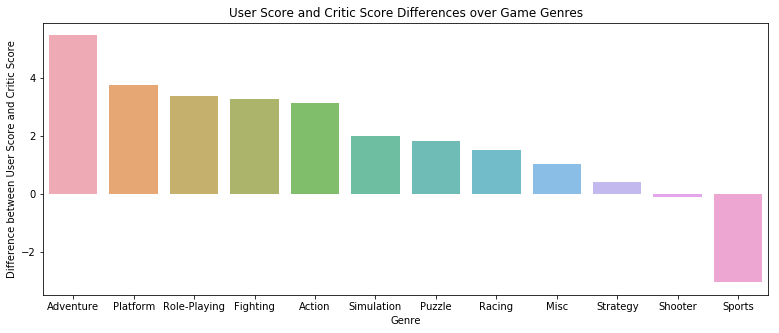

In [111]:
df2_scoresdiff=scores.difference.nlargest(12) #descending order

plt.figure(figsize=(13,5))
sns.barplot(df2_scoresdiff.index, df2_scoresdiff.values,alpha=0.8)
plt.ylabel("Difference between User Score and Critic Score")
plt.xlabel("Genre")
plt.title("User Score and Critic Score Differences over Game Genres")

##### Comment

In order to compare the critic scores and user scores of different genres, we have to multiply the user scores by 10 since the they are originally in the scale of 10. We then made the plot by subtracting the critic scores from user scores.


From the plot, we can see that user scores are generally higher than critic scores in most categories, with the exception of the genres "Shooter" and "Sports."

In terms of the difference between user scores and critic scores, we can see that “Adventure” games have higher user scores than critic scores and the difference there is quite large. On the other hand, “Sports” games have much higher critic scores than user scores.

#### Critic scores and users scores of genres over the years

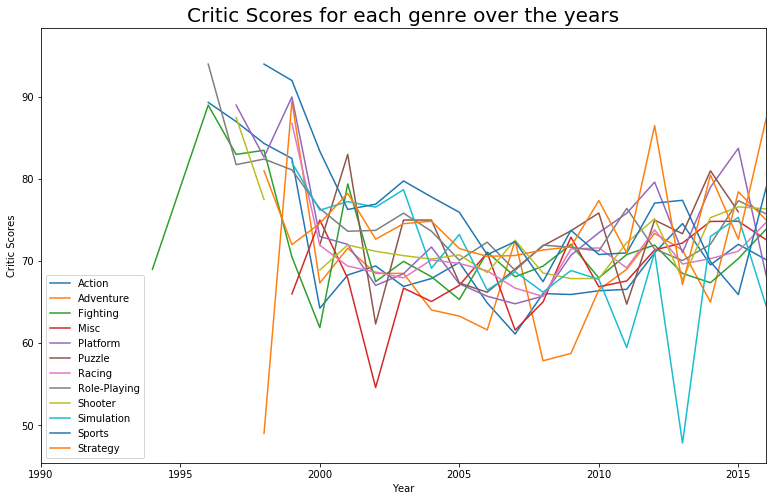

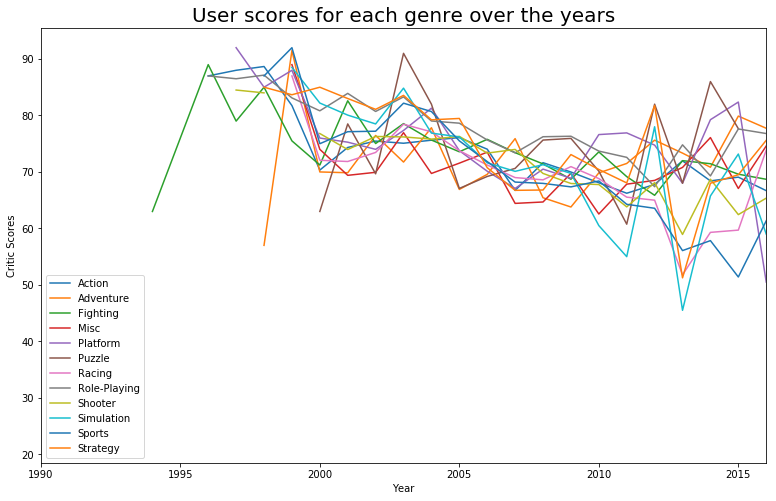

In [123]:
#plt.plot(scores.index,scores.User_Score, label='User Score')
#plt.plot(scores.index,scores.Critic_Score, label='Critic Score')

score_over_years=pd.pivot_table(df2_forscores[['Year_of_Release','Genre','Critic_Score']],index=['Year_of_Release'],columns='Genre',values='Critic_Score',aggfunc='mean')
score_over_years.fillna(0)

score_over_years2=pd.pivot_table(df2_forscores[['Year_of_Release','Genre','User_Score']],index=['Year_of_Release'],columns='Genre',values='User_Score',aggfunc='mean')
score_over_years2.fillna(0)

plt.figure(figsize=[13,8])
plt.plot(score_over_years.loc[:,'Action'])
plt.plot(score_over_years.loc[:,'Adventure'])
plt.plot(score_over_years.loc[:,'Fighting'])
plt.plot(score_over_years.loc[:,'Misc'])
plt.plot(score_over_years.loc[:,'Platform'])
plt.plot(score_over_years.loc[:,'Puzzle'])
plt.plot(score_over_years.loc[:,'Racing'])
plt.plot(score_over_years.loc[:,'Role-Playing'])
plt.plot(score_over_years.loc[:,'Shooter'])
plt.plot(score_over_years.loc[:,'Simulation'])
plt.plot(score_over_years.loc[:,'Sports'])
plt.plot(score_over_years.loc[:,'Strategy'])
plt.legend(prop={'size':10})
plt.xlim((1990, 2016)) 
plt.xlabel('Year',size=10)
plt.ylabel('Critic Scores',size=10)
plt.title("Critic Scores for each genre over the years",size=20)

plt.figure(figsize=[13,8])
plt.plot(score_over_years2.loc[:,'Action'])
plt.plot(score_over_years2.loc[:,'Adventure'])
plt.plot(score_over_years2.loc[:,'Fighting'])
plt.plot(score_over_years2.loc[:,'Misc'])
plt.plot(score_over_years2.loc[:,'Platform'])
plt.plot(score_over_years2.loc[:,'Puzzle'])
plt.plot(score_over_years2.loc[:,'Racing'])
plt.plot(score_over_years2.loc[:,'Role-Playing'])
plt.plot(score_over_years2.loc[:,'Shooter'])
plt.plot(score_over_years2.loc[:,'Simulation'])
plt.plot(score_over_years2.loc[:,'Sports'])
plt.plot(score_over_years2.loc[:,'Strategy'])
plt.legend(loc='lower left')
plt.xlim((1990, 2016)) 
plt.xlabel('Year',size=10)
plt.ylabel('Critic Scores',size=10)
plt.title("User scores for each genre over the years",size=20)
plt.show()

##### Comment

The distribution of critic scores and user scores for different game genres over the years seem to have a general shape.

There is a big decline from around 90 to 70 in the critic scores for most genres over the years 1995-2007, followed by a small increase after that. As for the user scores, most genres also have a decline across the years starting generally.

### 2) What does the number of game releases for each genre tell us?

In [12]:
genre = df2.Genre.value_counts()
print(genre)

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64


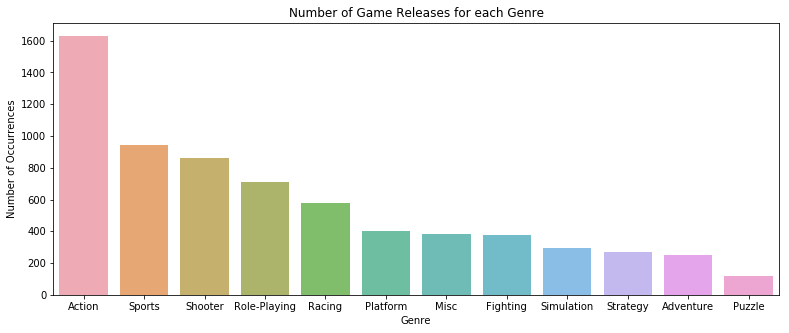

In [103]:
plt.figure(figsize=(13,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Number of Game Releases for each Genre')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

##### Comment

Among all 12 genres, the genre of "Action" has largest number of releases. There are much more releases of "Action" genre games than the rest. In contrast, the genre of "Puzzle" has the smallest number of releases.

### 3) What does the game sales for game genres tell us?

#### total sales over genres

Genre
Action          1203.16
Sports           833.85
Shooter          816.48
Role-Playing     501.37
Racing           476.22
Misc             416.26
Platform         377.80
Fighting         249.95
Simulation       202.70
Adventure         80.75
Puzzle            78.90
Strategy          69.61
Name: Global_Sales, dtype: float64


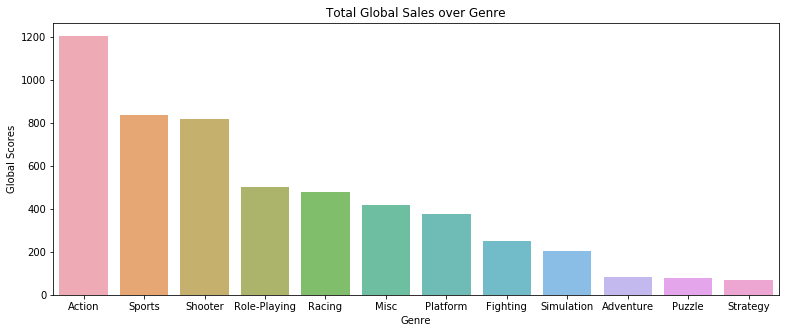

In [127]:
df2_sales=df2.groupby(['Genre']).Global_Sales.sum()
df2_sales=df2_sales.nlargest(12) #descending order
print(df2_sales)

plt.figure(figsize=(13,5))
sns.barplot(df2_sales.index, df2_sales.values, alpha=0.8)
plt.title("Total Global Sales over Genre")
plt.ylabel("Global Scores")
plt.show()

##### Comment

The genre of Action has highest global sales and the genre of Strategy has the lowest global sales.

#### Sales of different regions over game genres

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          591.23    387.78     76.17       147.46
Adventure        38.81     25.06      8.73         8.05
Fighting        136.39     60.50     27.85        25.14
Misc            222.05    120.46     33.22        40.41
Platform        193.60    108.56     43.09        32.53
Puzzle           33.50     24.04     14.98         6.33
Racing          225.59    164.66     27.76        58.29
Role-Playing    219.53    119.20    122.47        40.36
Shooter         448.76    261.12     18.57        87.90
Simulation       92.12     67.29     26.16        17.14
Sports          457.52    247.43     34.54        94.05
Strategy         33.25     25.21      4.34         6.61


Text(0,0.5,'Sales')

<Figure size 1440x720 with 0 Axes>

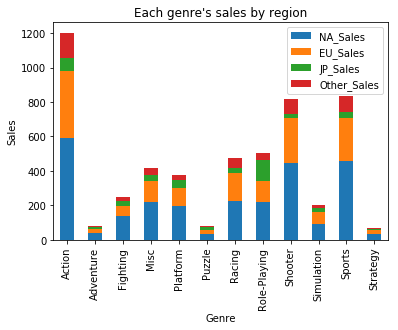

In [15]:
genre_sales=df2.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg('sum')
print(genre_sales)
plt.figure(figsize=[20,10])
genre_sales.plot(kind='bar',stacked=True)
plt.title("Each genre's sales by region")
plt.ylabel('Sales')

In [128]:
df2_GenreSales = df2[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df2_GenreSales = pd.melt(df2_GenreSales, id_vars="Genre", var_name="Sales_Area", value_name="Sales_Values")

In [129]:
df2_NA = df2_GenreSales.loc[df2_GenreSales.Sales_Area == "NA_Sales"]
df2_EU = df2_GenreSales.loc[df2_GenreSales.Sales_Area == "EU_Sales"]
df2_JP = df2_GenreSales.loc[df2_GenreSales.Sales_Area == "JP_Sales"]
df2_Other = df2_GenreSales.loc[df2_GenreSales.Sales_Area == "Other_Sales"]
df2_NA.head()

genre_sales_NA = df2_NA.groupby('Genre').Sales_Values.sum()
genre_sales_EU = df2_EU.groupby('Genre').Sales_Values.sum()
genre_sales_JP = df2_JP.groupby('Genre').Sales_Values.sum()
genre_sales_Other = df2_Other.groupby('Genre').Sales_Values.sum()

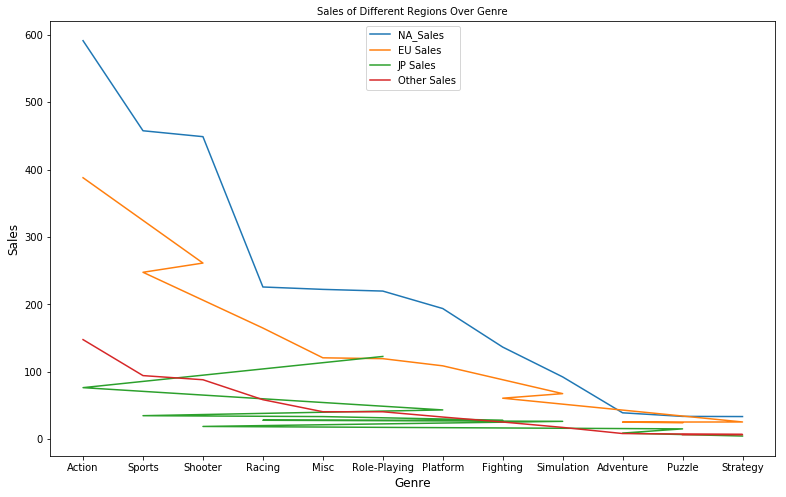

In [132]:
plt.figure(figsize=[13,8])
plt.plot(genre_sales_NA.index,genre_sales_NA.values, label='NA_Sales')
plt.plot(genre_sales_EU.index,genre_sales_EU.values, label='EU Sales')
plt.plot(genre_sales_JP.index,genre_sales_JP.values, label='JP Sales')
plt.plot(genre_sales_Other.index,genre_sales_Other.values, label='Other Sales')
plt.legend(loc='upper center')
plt.xlabel('Genre',size=12)
plt.ylabel('Sales',size=12)
plt.title("Sales of Different Regions Over Genre",size=10)
plt.show()

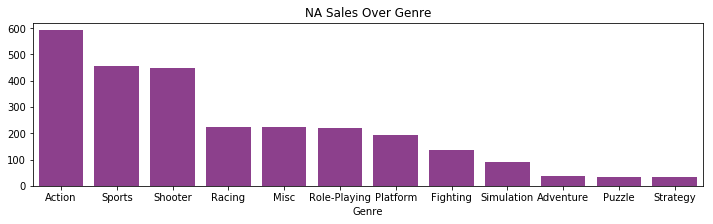

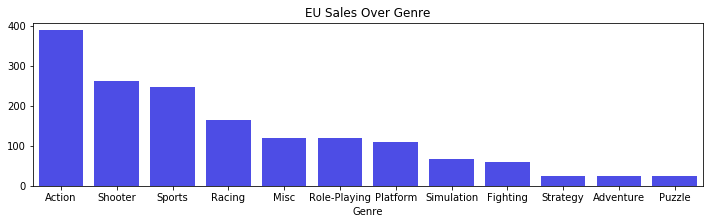

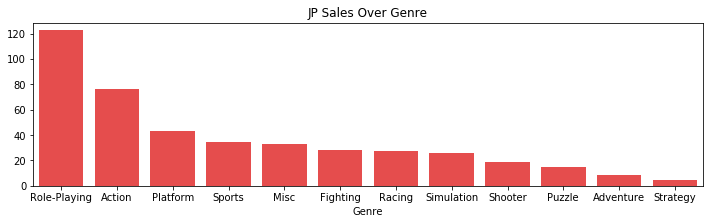

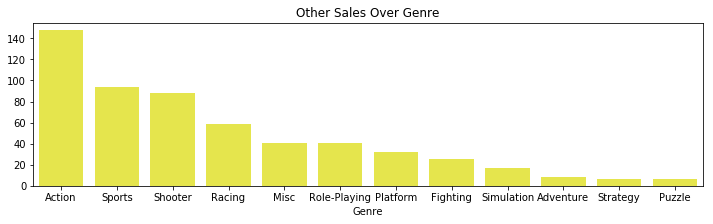

In [130]:
plt.figure(figsize=(12,3))
genre_sales_NA = df2_NA.groupby('Genre').Sales_Values.sum()
genre_sales_NA=genre_sales_NA.nlargest(12)
sns.barplot(genre_sales_NA.index, genre_sales_NA.values, alpha = 0.8, color = "purple")
plt.title("NA Sales Over Genre")
plt.show()

plt.figure(figsize=(12,3))
genre_sales_EU = df2_EU.groupby('Genre').Sales_Values.sum()
genre_sales_EU=genre_sales_EU.nlargest(12)
sns.barplot(genre_sales_EU.index, genre_sales_EU.values, alpha = 0.8, color = "blue")
plt.title("EU Sales Over Genre")
plt.show()

plt.figure(figsize=(12,3))
genre_sales_JP = df2_JP.groupby('Genre').Sales_Values.sum()
genre_sales_JP=genre_sales_JP.nlargest(12)
sns.barplot(genre_sales_JP.index, genre_sales_JP.values, alpha = 0.8, color = "red")
plt.title("JP Sales Over Genre")
plt.show()

plt.figure(figsize=(12,3))
genre_sales_Other = df2_Other.groupby('Genre').Sales_Values.sum()
genre_sales_Other=genre_sales_Other.nlargest(12)
sns.barplot(genre_sales_Other.index, genre_sales_Other.values, alpha = 0.8, color = "yellow")
plt.title("Other Sales Over Genre")
plt.show()

##### Comment

When it comes to the distribution of sales of different regions over genre, there are some similarities as well as differences. The sales of different genres come quite similar among NA, EU and other regions while the sales in Japan is quite different from the three.

From the barplots, we can see that in all regions, it is either the genre "Puzzle" or "Strategy" that has the lowest sales. Moreover, the genres of "Adventure," "Strategy" and "Puzzle" always come as the lowest three. 

However, the genres with higher sales have more differences across different regions. For example, while Action genre has the highest sales in most regions, it is the second highest in Japan, exceeded by the genre of "Role-Playing." In the case of "Role-Playing" genre, while it is the highest in Japan, it is only the 6th highest in other regions. This might be related to their thriving industries of animations.

### 4) Number of game releases over the years for each genre

Text(0,0.5,'Scores')

<Figure size 720x1080 with 0 Axes>

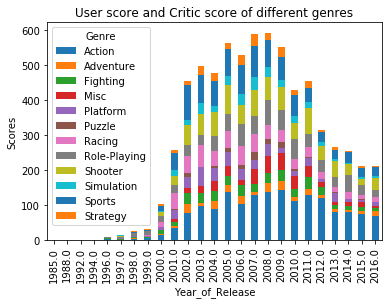

In [133]:
df2_forrelease=df2.groupby(["Year_of_Release","Genre"]).Name.count().unstack()
df2_forrelease.head()

plt.figure(figsize=(10,15))
df2_forrelease.plot(kind='bar', stacked=True)
plt.title("User score and Critic score of different genres")
plt.ylabel('Scores')

##### Comment

From the bar plot above, we can see that the number of released games went to a peak at the year 2008 and 2009, with the genres of "Action," "Sports" and "Shooter" being the largest.